## 모델평가
https://supkoon.tistory.com/26 -[자연어처리][Metric] ROUGE score : Recall-Oriented Understudy for Gisting Evaluation


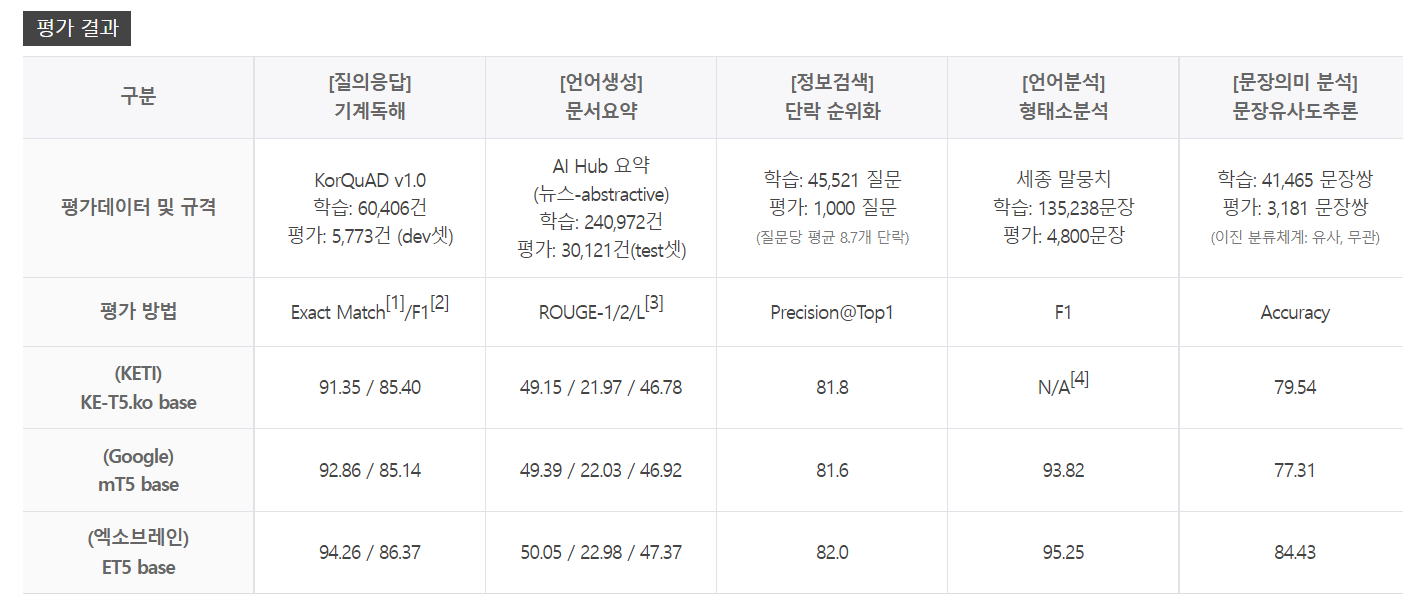

In [ ]:
## 검증
# ROUGE-1/2/L: 시스템 요약본과 정답 요약본 간 겹치는 unigram(1)/bigram(2)/최장(Longest) 길이 부분문자열의 비율

## KETI-AIR/ke-t5-base
https://github.com/AIRC-KETI/ke-t5

In [ ]:
# 기본 모델 불러오는 방법 (사전학습 X )
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model_name = 'KETI-AIR/ke-t5-base'
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)
# print(model) # 모델 구조 확인

In [ ]:
# model.config # 모델 config (모델 정보(?)) 확인

### !git clone

In [ ]:
# 모델 폴더 받아오기 ---> 폴더에 받아서 넣어뒀어요! 현재 폴더만 %cd로 바꿔주세요(아래 행) 
# !git clone https://github.com/AIRC-KETI/ke-t5.git
# %cd ke-t5
# !pip3 install -r requirements.txt

In [ ]:
%cd /content/drive/MyDrive/cakd3_3차프로젝트_2조/Datasets/ke-t5
!pip3 install -r requirements.txt

In [ ]:
input_str = """“처음에는 ‘금방 끝나겠지’라고 생각했는데 어느덧 100일이 됐네요. \
그동안 춥고 아프고 힘들었지만 인간으로서 대우를 받을 수만 있다면 끝까지 버틸 수 있습니다.” \
LG트윈타워 청소 노동자들이 고용승계를 주장하며 파업에 나선지 100일째를 하루 앞둔 24일 \
서울 여의도 LG트윈타워 앞 ‘행복한 고용승계 텐트촌’에서 만난 박상설(63)씨는 힘들었던 투쟁 과정을 \
회상하며 눈시울을 붉혔다. 박씨는 2017년부터 LG트윈타워에서 청소 노동을 했지만 지난 1월 1일부로 \
계약이 종료돼 직장을 떠났다. 자동차 소음과 불편한 잠자리로 텐트에서 매일 밤잠을 설치지만 투쟁을 \
포기할 수 없다고 한다. 그는 “LG가 그동안 사회적 책임과 정도경영을 강조해 왔기에 파업이 금방 끝날 \
줄 알았다”며 “버티지 못하고 점점 떠나는 동지들을 바라볼 때마다 마음이 아프지만 정당한 노동 권리를 \
인정받기 위해 끝까지 투쟁할 것”이라고 강조했다. 지난해 11월 26일부터 파업에 돌입한 청소 \
노동자들은 25일 파업 100일째를 맞는다. 건물 1층 로비에서 시위를 하던 25명의 청소 노동자들은 지난 \
22일부터 정문 앞 도보에 텐트촌을 설치하고 장소를 옮겼다. 파업 100일에 맞춰 25일까지 시민연대와 \
함께 텐트 100개를 설치하고 주·야간 연대 시위를 이어가겠다는 뜻에서다. 노동자들은 한 명이 간신히 \
누울 수 있는 크기의 텐트 안에서 딱딱한 시멘트 바닥에 몸을 기대 쪽잠을 청하고 있다. LG트윈타워를 \
관리하는 LG그룹 계열사 ‘에스엔아이코퍼레이션’은 지난해 말 ‘지수아이앤씨’와 청소 용역 계약을 \
끝내고 다른 업체와 새로 계약했다. 사측은 ‘품질 저하’를 이유로 들었다. 반면 노동자들은 2019년 \
노조를 결성하고 권리를 주장하기 시작하면서 사측 눈 밖에 났다고 주장한다. 그동안 업체가 \
변경되더라도 기존 업체 노동자들이 새 업체에 고용승계가 되는 게 관례였지만 새 업체는 고용승계를 \
보장할 수 없다고 밝혔다. 지난달까지 고용노동부 중재로 수차례 노사 교섭이 있었지만 상황은 달라지지 \
않았다. 사측은 대신 노동자들에게 다른 사업장에서 일을 하게 해주겠다고 권유했다. 하지만 노동자들은 \
노조를 인정하지 않는 대기업의 행태를 묵인한 채 사측의 권유에 따른다면 어느 사업장에서 일을 하던 \
똑같은 행태가 반복될 수밖에 없다고 목소리를 높인다. 때문에 반드시 LG트윈타워에서 정당한 권리를 \
인정받고 노동을 이어가야만 한다고 말한다. 이들은 구광모 LG그룹 회장이 나서 문제를 해결해야 한다고 \
주장한다. 이혜정 LG트윈타워 공동대책위원회 집행위원은 “구 회장이 책임있는 답변을 내놓을 때까지 \
시민사회 단위와 함께 결의를 담아 끝까지 텐트촌을 유지할 것”이라고 강조했다."""

In [ ]:
# pip install tensorflow tensorflow_text
import numpy as np
import tensorflow as tf
import tensorflow_text

model_path = "./downstream_exported/t5.1.1.small.gin.ke.ke_v100_span_corruption.ke_t5_nikl_summary_mixture_equal"
loaded = tf.saved_model.load(model_path)
infer = loaded.signatures["serving_default"]

# source: https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=081&aid=0003173411
# press: 서울신문(www.seoul.co.kr)
# author: 이주원 기자 starjuwon@seoul.co.kr


input_str_topic = "summarize_topic: " + input_str
input_str_summary = "summarize_summary: " + input_str

x = tf.constant([input_str_summary])

result = infer(x)
print([out.decode('utf-8') for out in result['inputs'].numpy()])
print([out.decode('utf-8') for out in result['outputs'].numpy()])

# summarize_topic
# 'LG트윈타워 청소 노동자가 고용승계를 주장하며 파업에 나선지 100일째를 하루 앞둔 24일 서울 \
# 여의도 LG트윈타워 앞 ‘행복한 고용승계 텐트촌’에서 만난 박상설(63)씨는 힘들었던 투쟁 과정을 \
# 회상하며 눈시울을 붉혔다. 반면 노동자들은 2019년 노조를 결성하고 권리를 주장하기 시작하면서 사측 \
# 눈 밖에 났다고 주장한다. 때문에 반드시 LG트윈타워에서 정당한 권리를 인정받고 노동을 이어가야 \
# 한다고 말한다.

# summarize_summary
# 'LG트윈타워 청소 노동자가 고용승계를 주장하며 파업에 나선지 100일째를 맞았다. LG트윈타워를 \
# 관리하는 LG그룹 계열사 ‘에스엔아이코퍼레이션’은 지난해 말 ‘지수아이앤씨’와 청소 용역 계약을 \
# 끝내고 다른 업체와 새로 계약했다. 그러나 노동자들은 노조를 인정하지 않는 대기업의 행태를 묵인한 \
# 채 사측의 권유에 따라 노동을 이어가라고 주장한다.'



['summarize_summary: “처음에는 ‘금방 끝나겠지’라고 생각했는데 어느덧 100일이 됐네요. 그동안 춥고 아프고 힘들었지만 인간으로서 대우를 받을 수만 있다면 끝까지 버틸 수 있습니다.” LG트윈타워 청소 노동자들이 고용승계를 주장하며 파업에 나선지 100일째를 하루 앞둔 24일 서울 여의도 LG트윈타워 앞 ‘행복한 고용승계 텐트촌’에서 만난 박상설(63)씨는 힘들었던 투쟁 과정을 회상하며 눈시울을 붉혔다. 박씨는 2017년부터 LG트윈타워에서 청소 노동을 했지만 지난 1월 1일부로 계약이 종료돼 직장을 떠났다. 자동차 소음과 불편한 잠자리로 텐트에서 매일 밤잠을 설치지만 투쟁을 포기할 수 없다고 한다. 그는 “LG가 그동안 사회적 책임과 정도경영을 강조해 왔기에 파업이 금방 끝날 줄 알았다”며 “버티지 못하고 점점 떠나는 동지들을 바라볼 때마다 마음이 아프지만 정당한 노동 권리를 인정받기 위해 끝까지 투쟁할 것”이라고 강조했다. 지난해 11월 26일부터 파업에 돌입한 청소 노동자들은 25일 파업 100일째를 맞는다. 건물 1층 로비에서 시위를 하던 25명의 청소 노동자들은 지난 22일부터 정문 앞 도보에 텐트촌을 설치하고 장소를 옮겼다. 파업 100일에 맞춰 25일까지 시민연대와 함께 텐트 100개를 설치하고 주·야간 연대 시위를 이어가겠다는 뜻에서다. 노동자들은 한 명이 간신히 누울 수 있는 크기의 텐트 안에서 딱딱한 시멘트 바닥에 몸을 기대 쪽잠을 청하고 있다. LG트윈타워를 관리하는 LG그룹 계열사 ‘에스엔아이코퍼레이션’은 지난해 말 ‘지수아이앤씨’와 청소 용역 계약을 끝내고 다른 업체와 새로 계약했다. 사측은 ‘품질 저하’를 이유로 들었다. 반면 노동자들은 2019년 노조를 결성하고 권리를 주장하기 시작하면서 사측 눈 밖에 났다고 주장한다. 그동안 업체가 변경되더라도 기존 업체 노동자들이 새 업체에 고용승계가 되는 게 관례였지만 새 업체는 고용승계를 보장할 수 없다고 밝혔다. 지난달까지 고용노동부 중재로 수차례 노사 교섭이 있었지만 상황

In [ ]:
# 다른예시
input_str_ex = """미덕의 실행은 우리에게 달려 있고, 그 점은 악덕도 마찬가지이다. 행하는 것이 우리에게 달려 있는 곳에서는 행하지 않는 것도 우리에게 달려 있으며, 거부하는 것이 우리에게 달려 있는 곳에서는 받아들이는 것도 우리에게 달려 있기 때문이다. 따라서 고매한 행위를 하는 것이 우리에게 달려 있다면 수치스러운 행위를 하지 않는 것도 우리에게 달려 있을 것이며, 고매한 행위를 하지 않는 것이 우리에게 달려 있다면 수치스러운 행위를 하는 것도 우리에게 달려 있다고 하겠다. 고매한 행위나 수치스러운 행위를 하고 안 하고가 우리에게 달려 있고 고매한 행위를 하는지 수치스러운 행위를 하는지가 좋음과 나쁨의 요체라면, 훌륭한 사람이 되는지 보잘것없는 사람이 되는지는 우리에게 달려 있다.\
‘세상에는 자발적으로 사악한 사람도 없고 비자발적으로 복 받는 사람도 없다’는 말은 일부는 틀리고 일부는 맞다. 복 받기를 원하지 않을 사람은 아무도 없지만, 사악함은 자발적이기 때문이다. 그렇지 않다면 우리는 방금 말한 것을 반박하며 인간이 자기 행위의 제1 원리임을, 또는 자식을 낳듯 자기 행위를 낳는 자임을 부인해야 할 것이다. 그러나 사실이 분명 그렇고 우리가 우리 안에 있는 제1 원리들을 넘어 다른 제1 원리로 거슬러 올라갈 수 없다면, 제1 원리가 우리 안에 있는 행위들 역시 우리에게 달려 있으며 자발적인 것이다. \
이러한 사실은 입법자들에 의해서도 뒷받침된다. 실제로 입법자들은 무지에 대한 책임이 범죄자에게 있다고 생각되면 무지 자체 때문에 범죄자를 처벌한다. 이를테면 술취한 범죄자에게는 가중처벌을 내린다. 술에 취하지 않을 수도 있었으므로 제1 원리는 그에게 있고 술에 취한 것이 그의 무지의 원인이기 때문이다. 또한 입법자들은 반드시 알고 있어야 하는 간단한 법규를 모르는 사람들도 처벌한다. 이 점은 사람들이 부주의한 탓에 무지하다고 생각되는 다른 경우도 마찬가지이다. 그들에게는 조심할 능력이 있기 때문이다. 본성적으로 조심하지 않는 사람들도 있을 것이다. 그러나 사람들이 느슨한 생활 태도 탓에 그렇게 되는 것은 본인 책임이다. """

In [ ]:
# input_str_topic = "summarize_topic: " + input_str_ex
input_str_summary = "summarize_summary: " + input_str_ex

x = tf.constant([input_str_summary])

result = infer(x)
print([out.decode('utf-8') for out in result['inputs'].numpy()])
print([out.decode('utf-8') for out in result['outputs'].numpy()])

['summarize_summary: 미덕의 실행은 우리에게 달려 있고, 그 점은 악덕도 마찬가지이다. 행하는 것이 우리에게 달려 있는 곳에서는 행하지 않는 것도 우리에게 달려 있으며, 거부하는 것이 우리에게 달려 있는 곳에서는 받아들이는 것도 우리에게 달려 있기 때문이다. 따라서 고매한 행위를 하는 것이 우리에게 달려 있다면 수치스러운 행위를 하지 않는 것도 우리에게 달려 있을 것이며, 고매한 행위를 하지 않는 것이 우리에게 달려 있다면 수치스러운 행위를 하는 것도 우리에게 달려 있다고 하겠다. 고매한 행위나 수치스러운 행위를 하고 안 하고가 우리에게 달려 있고 고매한 행위를 하는지 수치스러운 행위를 하는지가 좋음과 나쁨의 요체라면, 훌륭한 사람이 되는지 보잘것없는 사람이 되는지는 우리에게 달려 있다.‘세상에는 자발적으로 사악한 사람도 없고 비자발적으로 복 받는 사람도 없다’는 말은 일부는 틀리고 일부는 맞다. 복 받기를 원하지 않을 사람은 아무도 없지만, 사악함은 자발적이기 때문이다. 그렇지 않다면 우리는 방금 말한 것을 반박하며 인간이 자기 행위의 제1 원리임을, 또는 자식을 낳듯 자기 행위를 낳는 자임을 부인해야 할 것이다. 그러나 사실이 분명 그렇고 우리가 우리 안에 있는 제1 원리들을 넘어 다른 제1 원리로 거슬러 올라갈 수 없다면, 제1 원리가 우리 안에 있는 행위들 역시 우리에게 달려 있으며 자발적인 것이다. 이러한 사실은 입법자들에 의해서도 뒷받침된다. 실제로 입법자들은 무지에 대한 책임이 범죄자에게 있다고 생각되면 무지 자체 때문에 범죄자를 처벌한다. 이를테면 술취한 범죄자에게는 가중처벌을 내린다. 술에 취하지 않을 수도 있었으므로 제1 원리는 그에게 있고 술에 취한 것이 그의 무지의 원인이기 때문이다. 또한 입법자들은 반드시 알고 있어야 하는 간단한 법규를 모르는 사람들도 처벌한다. 이 점은 사람들이 부주의한 탓에 무지하다고 생각되는 다른 경우도 마찬가지이다. 그들에게는 조심할 능력이 있기 때문이다. 본성적으로 조심하지 않는 사람들도 있을 

### fine tuning 하는 방법 찾기.